# Predicting the Prices of Airline Tickets using Machine Learning

## Importing important Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data & Treating Null values

In [35]:
train_data = pd.read_excel('Data_Train.xlsx')

In [36]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10683 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 918.2+ KB


In [38]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [39]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [40]:
train_data.shape

(10683, 11)

### Only 1 missing value in 10000 data points - so we can simply delete that data row.

In [41]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [42]:
train_data[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [43]:
train_data.dropna(inplace=True)

In [44]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Pre-processing & Feature Engineering on Date Column

In [45]:
data = train_data.copy()

In [46]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [47]:
data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

### Date is in string format, we need to convert it to Timestamp feature, so that Date, Month & Year can be extracted from it.

In [48]:
def change_into_datetime(col):
    '''
    This function converts the column passed to Date Time feature.
    '''
    data[col] = pd.to_datetime(data[col])

In [50]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(feature)

In [51]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-10-05 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897.0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-05 05:50:00,2022-10-05 13:15:00,7h 25m,2 stops,No info,7662.0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-10-05 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882.0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-10-05 18:05:00,2022-10-05 23:30:00,5h 25m,1 stop,No info,6218.0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-10-05 16:50:00,2022-10-05 21:35:00,4h 45m,1 stop,No info,13302.0


In [52]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [53]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

## Extracting Day, Month & Year from Journey Date

In [54]:
data['journey_day']=data['Date_of_Journey'].dt.day

In [55]:
data['journey_month']=data['Date_of_Journey'].dt.month

In [56]:
data['journey_year']=data['Date_of_Journey'].dt.year

In [57]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-10-05 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-05 05:50:00,2022-10-05 13:15:00,7h 25m,2 stops,No info,7662.0,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-10-05 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882.0,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-10-05 18:05:00,2022-10-05 23:30:00,5h 25m,1 stop,No info,6218.0,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-10-05 16:50:00,2022-10-05 21:35:00,4h 45m,1 stop,No info,13302.0,3,1,2019


In [58]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [59]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-10-05 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-05 05:50:00,2022-10-05 13:15:00,7h 25m,2 stops,No info,7662.0,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-10-05 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882.0,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-10-05 18:05:00,2022-10-05 23:30:00,5h 25m,1 stop,No info,6218.0,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-10-05 16:50:00,2022-10-05 21:35:00,4h 45m,1 stop,No info,13302.0,3,1,2019


## Extracting Day, Month, Year & Time (Hour & Min) from Departure & Arrival Date

In [60]:
def extract_hour_min(df,col):
    '''
    The function extracts hour and minute from datetime column.
    '''
    df[col + '_hour'] = df[col].dt.hour
    df[col + '_min'] = df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head()

In [61]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-05 13:15:00,7h 25m,2 stops,No info,7662.0,5,1,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-10 04:25:00,19h,2 stops,No info,13882.0,6,9,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-10-05 23:30:00,5h 25m,1 stop,No info,6218.0,5,12,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-10-05 21:35:00,4h 45m,1 stop,No info,13302.0,3,1,2019,16,50


In [62]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,3,1,2019,16,50,21,35


## Exploratory Data Analysis

### Analysing when most of flights take-off

#### Grouping hours as per time of day
0 - 4 : Late Night,
4 - 8 : Early Morning,
8 - 12: Morning,
12- 16: Noon,
16- 20: Evening,
20- 24: Night,

In [63]:
def flight_dep_time(x):
    '''
    This function groups flights as per time of take-off.
    '''
    
    if (x >= 0) and (x < 4):
        return 'Late Night'
    
    if (x >= 4) and (x < 8):
        return 'Early Morning'
    
    if (x >= 8) and (x < 12):
        return 'Morning'
    
    if (x >= 12) and (x < 16):
        return 'Noon'
    
    if (x >= 16) and (x < 20):
        return 'Evening'
    else:
        return 'Night'
    

In [68]:
data['Time_of_day'] = data['Dep_Time_hour'].apply(flight_dep_time)

In [70]:
data['Time_of_day'].value_counts()

Morning          2728
Early Morning    2353
Evening          2178
Night            1691
Noon             1437
Late Night        295
Name: Time_of_day, dtype: int64

<AxesSubplot:>

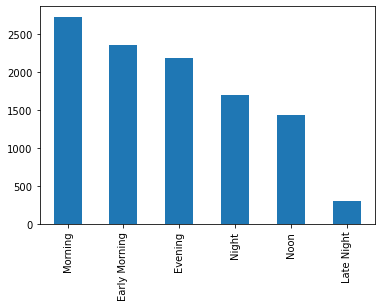

In [64]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

### Installing & Using Plotly and Cufflinks to make graph more interactive
Plotly and Cufflinks can be used for any graph.

In [65]:
!pip install plotly
!pip install cufflinks

In [71]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [72]:
cf.go_offline()

In [76]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar',legend=True)

#### iplot uses the cufflinks rapper over plotly that runs matplotlib under the whole

### Pre-process Duration Feature and extraxt meaningful features from it

In [74]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Time_of_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,1,10,Night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,5,1,2019,5,50,13,15,Early Morning
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,6,9,2019,9,25,4,25,Morning
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,5,12,2019,18,5,23,30,Evening
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,3,1,2019,16,50,21,35,Evening


#### Converting this categorical feature to numerical 

In [77]:
def preprocess_duration(x):
    '''
    This function preprocess duration feature and adds hours and mins, if missing.
    '''
    if 'h' not in x:
        x = '0h '+x
        
    elif 'm' not in x:
        x = x+' 0m'
    
    return x

In [87]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [88]:
data.tail(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Time_of_day
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107.0,4,9,2019,19,55,22,25,Evening
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145.0,27,4,2019,20,45,23,20,Night
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229.0,27,4,2019,8,20,11,20,Morning
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648.0,3,1,2019,11,30,14,10,Morning
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,8h 20m,2 stops,No info,11753.0,5,9,2019,10,55,19,15,Morning


In [97]:
### Segregating hour and mins and converting string into numerical data

In [96]:
data['Duration'][0].split(' ')[0]

'2h'

In [99]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [94]:
data['Duration'][0].split(' ')[1]

'50m'

In [101]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [102]:
# Applying lambda function on this duration feature

In [103]:
data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10682, dtype: int64

In [104]:
data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration, Length: 10682, dtype: int64

### We can alternatively define a function to carry the same task (extract hours and minutes from durtaion).

In [116]:
def duration_hours(x):
    '''
    This function returns only the hours from duration feature. 
    '''
    return int(x.split(' ')[0][0:-1])

In [117]:
data['Duration_hours'] = data['Duration'].apply(duration_hours)

In [118]:
def duration_mins(x):
    '''
    This function returns only the minutes from duration feature. 
    '''
    return int(x.split(' ')[1][0:-1])

In [119]:
data['Duration_mins'] = data['Duration'].apply(duration_mins)

In [120]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Time_of_day,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,1,10,Night,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,5,1,2019,5,50,13,15,Early Morning,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882.0,6,9,2019,9,25,4,25,Morning,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,5,12,2019,18,5,23,30,Evening,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,3,1,2019,16,50,21,35,Evening,4,45


## Analysing whether Duration impacts price or not?

In [ ]:
# Converting total duration to minutes. 
    # In duration feature - replace 'h' with '*60', ' ' with '+' and 'm' with '*1'
    # and then convert string to numerical datatype

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10682 non-null  object 
 1   Source             10682 non-null  object 
 2   Destination        10682 non-null  object 
 3   Route              10682 non-null  object 
 4   Duration           10682 non-null  object 
 5   Total_Stops        10682 non-null  object 
 6   Additional_Info    10682 non-null  object 
 7   Price              10682 non-null  float64
 8   journey_day        10682 non-null  int64  
 9   journey_month      10682 non-null  int64  
 10  journey_year       10682 non-null  int64  
 11  Dep_Time_hour      10682 non-null  int64  
 12  Dep_Time_min       10682 non-null  int64  
 13  Arrival_Time_hour  10682 non-null  int64  
 14  Arrival_Time_min   10682 non-null  int64  
 15  Time_of_day        10682 non-null  object 
 16  Duration_hours     106

In [130]:
# eval function does the mathematical calculations
'2*60+50*1'

'2*60+50*1'

In [131]:
eval('2*60+50*1')

170

In [132]:
data['Duration_total_mins'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [153]:
data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Time_of_day,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,1,10,Night,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,5,1,2019,5,50,13,15,Early Morning,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882.0,6,9,2019,9,25,4,25,Morning,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,5,12,2019,18,5,23,30,Evening,5,25,325
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,3,1,2019,16,50,21,35,Evening,4,45,285


### We can now use a Scatter plot or a LM plot (it is combination of Regression plot & Scatter plot)

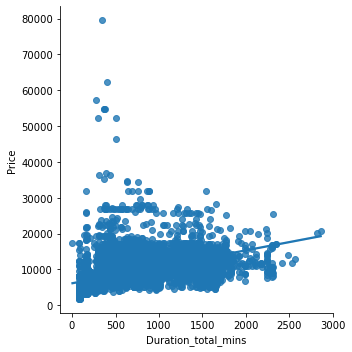

In [135]:
sns.lmplot(x='Duration_total_mins',y='Price',data=data)

### Thus as flight duration increases, the cost of flight also increases.

## Which city has maximum final destinations of flight?

In [136]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [149]:
data['Destination'] = data['Destination'].replace('New Delhi','Delhi')

In [150]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:ylabel='Destination'>

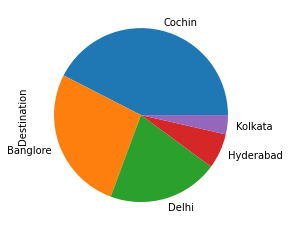

In [151]:
data['Destination'].value_counts().plot(kind='pie')

## Which is the most common route used by Jet Airways?

In [159]:
# Dataframe with only Jet Airways flights
data[data['Airline']=='Jet Airways']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Time_of_day,Duration_hours,Duration_mins,Duration_total_mins
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882.0,6,9,2019,9,25,4,25,Morning,19,0,1140
6,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087.0,3,12,2019,18,55,10,25,Evening,15,30,930
7,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270.0,3,1,2019,8,0,5,5,Morning,21,5,1265
8,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087.0,3,12,2019,8,55,10,25,Morning,25,30,1530
13,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663.0,5,9,2019,21,10,9,20,Night,12,10,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219.0,5,9,2019,11,40,19,0,Morning,7,20,440
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150.0,27,6,2019,23,5,19,0,Night,19,55,1195
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,15h 0m,2 stops,No info,16704.0,27,5,2019,13,25,4,25,Noon,15,0,900
10674,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087.0,3,12,2019,20,35,21,20,Night,24,45,1485


In [161]:
# Unique routes flown by Jet airways
data[data['Airline']=='Jet Airways']['Route'].unique()

array(['DEL → LKO → BOM → COK', 'BLR → BOM → DEL', 'CCU → BOM → BLR',
       'DEL → BOM → COK', 'DEL → IDR → BOM → COK',
       'DEL → NAG → BOM → COK', 'DEL → AMD → BOM → COK', 'DEL → COK',
       'CCU → DEL → BLR', 'BOM → HYD', 'BLR → DEL',
       'DEL → JAI → BOM → COK', 'DEL → ATQ → BOM → COK',
       'DEL → BDQ → BOM → COK', 'BLR → MAA → DEL',
       'DEL → JDH → BOM → COK', 'DEL → UDR → BOM → COK',
       'CCU → GAU → BLR', 'DEL → BHO → BOM → COK',
       'DEL → DED → BOM → COK', 'DEL → MAA → BOM → COK',
       'BOM → DED → DEL → HYD', 'DEL → IXC → BOM → COK',
       'CCU → BOM → PNQ → BLR', 'BOM → DEL → HYD',
       'BLR → BOM → JDH → DEL', 'BLR → BDQ → DEL',
       'BOM → BDQ → DEL → HYD', 'BOM → UDR → DEL → HYD',
       'BOM → JDH → DEL → HYD', 'BOM → IDR → DEL → HYD',
       'DEL → CCU → BOM → COK', 'BOM → VNS → DEL → HYD'], dtype=object)

In [163]:
# Count of each unique route flown by Jet airways
data[data['Airline']=='Jet Airways']['Route'].value_counts()

CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
Name: Route, dtype: int64

### Alternate approach

In [167]:
# Groupby routes flown by Jet airways and calculate size of each group and sort it in descending order
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

## Airline vs Price distribution of flights

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

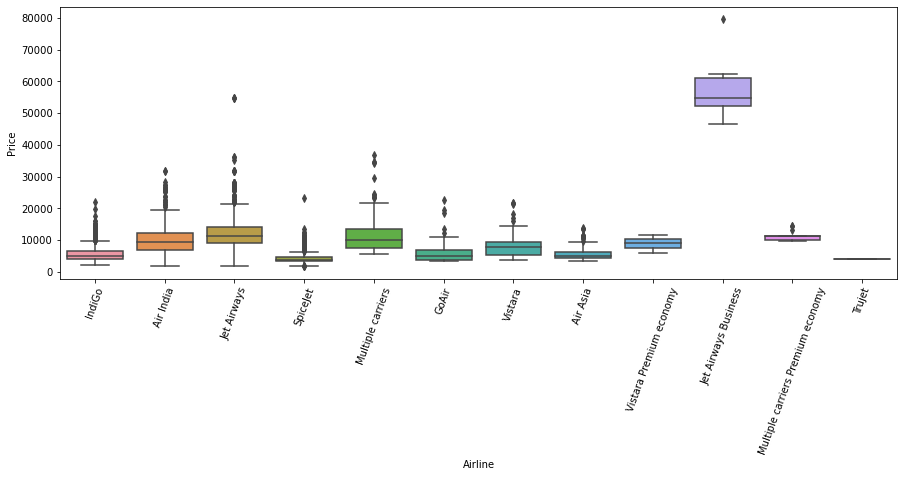

In [174]:
plt.figure(figsize = (15,5))
sns.boxplot(y='Price', x='Airline', data=data)
plt.xticks(rotation='70')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

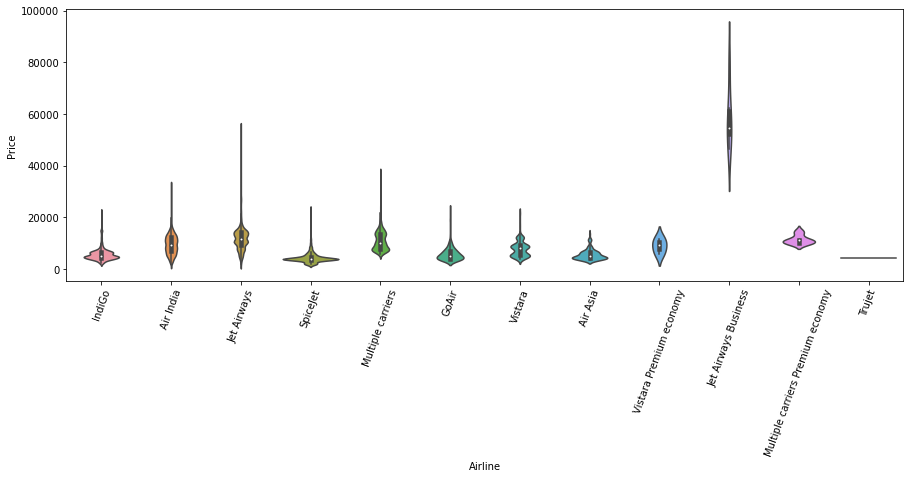

In [175]:
# Violin plot is similar to boxplot plus it gives distribution of data
plt.figure(figsize = (15,5))
sns.violinplot(y='Price', x='Airline', data=data)
plt.xticks(rotation='70')